In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
G = nx.Graph()
edge_list = [('A', 'B', 2.0),
             ('A', 'G', 16.0),
             ('A', 'D', 3.0),
             ('B', 'C', 5.0),
             ('B', 'G', 12.0),
             ('B', 'E', 9.0)]
G.add_weighted_edges_from(edge_list)

{(1, 2): Text(1.5,1.5,'0.5'), (1, 3): Text(1,0.5,'9.8')}

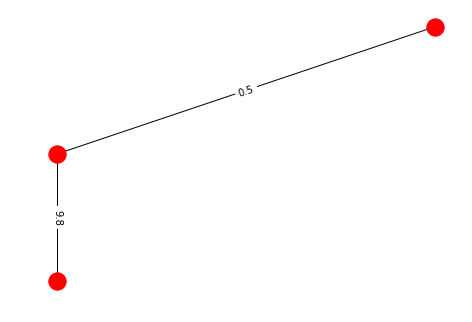

In [26]:

nx.draw(G, with_labels=True, font_weight='bold')
pos=nx.get_node_attributes(G,'pos')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

{(1, 2): Text(1.5,1.5,'0.5'), (1, 3): Text(1,0.5,'9.8')}

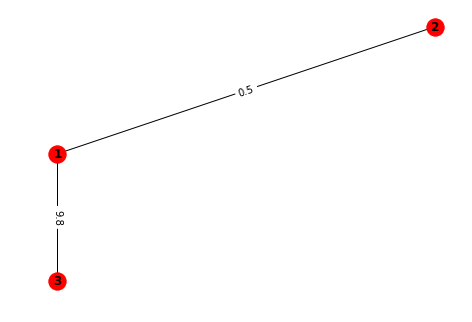

In [28]:
G=nx.Graph()
i=1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=9.8)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos,  with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
